In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

sim = rebound.Simulation()
sim.start_server(port=1234)

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import rebound
import time
import numpy as np
import random

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

def show_progress(i):
    # shows progress during long simulations
    print(".", end="", flush=True)
    if not (i+1)%80:
        print() # start a new line
    return

def setup_disk(N=10000, mass=1e-2):
    # initialize a circular disk of N planetesimals
    for i in range(N):
        # choose a random radial location and angle around the orbit
        r = np.random.uniform(0.3, 3.0)
        theta = np.random.uniform(0, 2*np.pi)
        sim.add(
            # set the planetesimal mass so that we get the correct total mass for the disk
            m=mass/N,
            # circular orbit
            x=r*np.cos(theta),
            y=r*np.sin(theta),
            vx=-np.sin(theta)/np.sqrt(r),
            vy=np.cos(theta)/np.sqrt(r)
        )
    return

Running simulation:
....................
Sim time = 101.980 s
Making plots:
....................

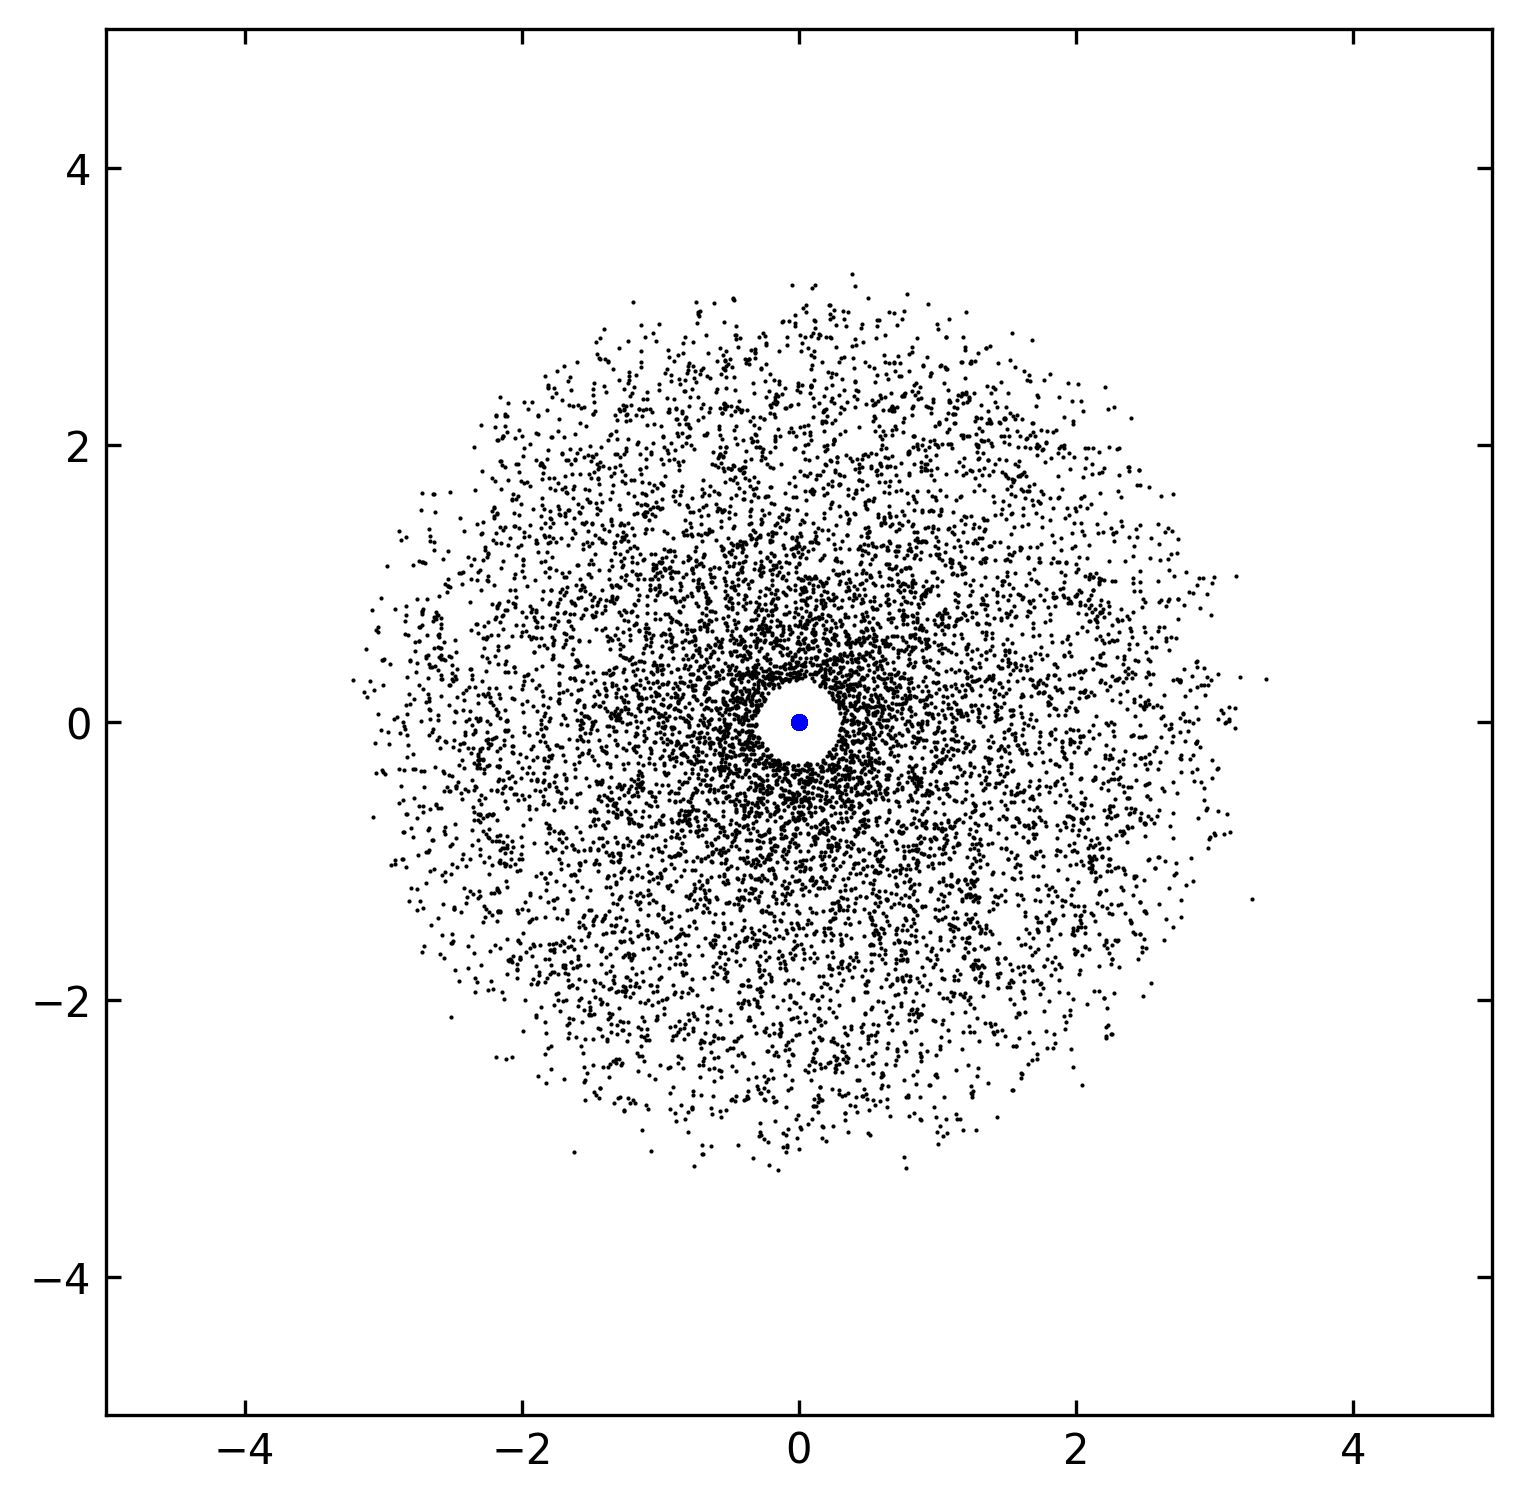


Total time = 102.720 s


In [8]:
start = time.time()

sim = rebound.Simulation()

# start the visualization server: in your browser go to http://localhost:1234
sim.start_server(port=1234)

# use a tree code since we will have many particles
sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.dt = 0.01
# soften the interaction for close approaches
sim.softening = 0.01

# define a box size for the simulation and add "open" boundary conditions
# particles that leave the box will be removed
boxsize = 10
sim.configure_box(boxsize)
sim.boundary = "open"

# Star
# we'll use a hash to label it so we can find it later
sim.add(m=1.0, hash="star")

# Planetesimals
Nparticles = 10000
setup_disk(N=Nparticles, mass=1e-2)

sim.move_to_com()

Noutputs = 20
Norbits = 10

print("Running simulation:")
times = np.linspace(0, Norbits * 2*np.pi, Noutputs)
dt = times[-1]/(Noutputs-1)
xy = np.zeros((Noutputs, Nparticles+1, 2))
xs = np.zeros(Noutputs)
ys = np.zeros(Noutputs)
for i,t in enumerate(times):
    sim.integrate(t, exact_finish_time=1)
    show_progress(i)
    # store the particle positions
    for j, p in enumerate(sim.particles):
        # store the (x,y) locations of each particle
        xy[i][j] = [p.x, p.y]
    # the star position is included in xy[][] but we'll also store it separately:
    xs[i] = sim.particles["star"].x
    ys[i] = sim.particles["star"].y

# shut down the visualization server; this will stop it complaining next time we run the simulation
sim.stop_server(port=1234)
print('\nSim time = %.3f s' % (time.time()-start,))

# The (x,y) limits for the snapshots
L = boxsize/2

print("Making plots:")
for i,t in enumerate(times):
    show_progress(i)
    
    # plot the current configuration of the particles in the planet's frame
    plt.figure(figsize=(6,6), dpi=150)    
    plt.xlim((-L,L))
    plt.ylim((-L,L))
    
    plt.plot(xy[i,:,0],xy[i,:,1],'ko',ms=1,markeredgewidth=0)
    plt.plot(xs,ys,'bo',ms=3)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('/Users/patrickhorlaville/Downloads/PHYS633/week5/png/plot%03d.png' % (i,))
    if i==Noutputs-1: # show the last plot
        plt.show()
    plt.close()

print('\nTotal time = %.3f s' % (time.time()-start,))

# to make a movie you can use:
# images_to_movie.sh 'png/plot%3d.png' movie.mp4

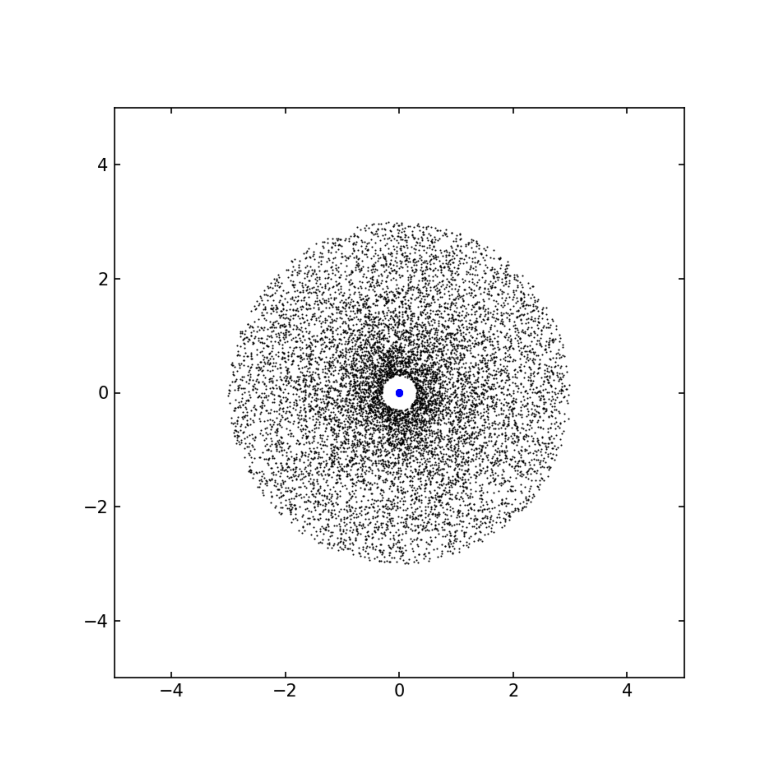

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import glob
from IPython.display import HTML


files = sorted(glob.glob("png/plot*.png"))

fig = plt.figure()
plt.axis("off")

img = plt.imshow(Image.open(files[0]))

def update(i):
    img.set_data(Image.open(files[i]))
    return [img]

ani = animation.FuncAnimation(fig, update, frames=len(files), interval=100)

HTML(ani.to_jshtml())

In [15]:
from IPython.display import HTML
HTML(ani.to_jshtml())

# 1.

a)

Add a planet to the disk in a circular orbit with a = 1

start with a planet mass = 10% of disk. total disk mass is 1e-2 = 0.01. so we set planet mass to 0.001

In [9]:
start = time.time()

sim = rebound.Simulation()

# start the visualization server: in your browser go to http://localhost:1234
sim.start_server(port=1234)

# use a tree code since we will have many particles
sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.dt = 0.01
# soften the interaction for close approaches
sim.softening = 0.01

# define a box size for the simulation and add "open" boundary conditions
# particles that leave the box will be removed
boxsize = 10
sim.configure_box(boxsize)
sim.boundary = "open"

# Star
# we'll use a hash to label it so we can find it later
sim.add(m=1.0, hash="star")
sim.add(m=0.001, a=1.0, e=0, hash='planet')

# Planetesimals
Nparticles = 5000
setup_disk(N=Nparticles, mass=1e-2)

sim.move_to_com()

Noutputs = 500
Norbits = 50

print("Running simulation:")
times = np.linspace(0, Norbits * 2*np.pi, Noutputs)
dt = times[-1]/(Noutputs-1)
xy = np.zeros((Noutputs, Nparticles+2, 2))
xs = np.zeros(Noutputs)
ys = np.zeros(Noutputs)
xp = np.zeros(Noutputs)
yp = np.zeros(Noutputs)

for i,t in enumerate(times):
    sim.integrate(t, exact_finish_time=1)
    show_progress(i)
    # store the particle positions
    for j, p in enumerate(sim.particles):
        # store the (x,y) locations of each particle
        xy[i][j] = [p.x, p.y]
    # the star position is included in xy[][] but we'll also store it separately:
    xs[i] = sim.particles["star"].x
    ys[i] = sim.particles["star"].y

    # the star position is included in xy[][] but we'll also store it separately:
    xp[i] = sim.particles["planet"].x
    yp[i] = sim.particles["planet"].y

# shut down the visualization server; this will stop it complaining next time we run the simulation
sim.stop_server(port=1234)
print('\nSim time = %.3f s' % (time.time()-start,))

Running simulation:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................
Sim time = 218.408 s


Save the snapshots to make the movie

Making plots:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................

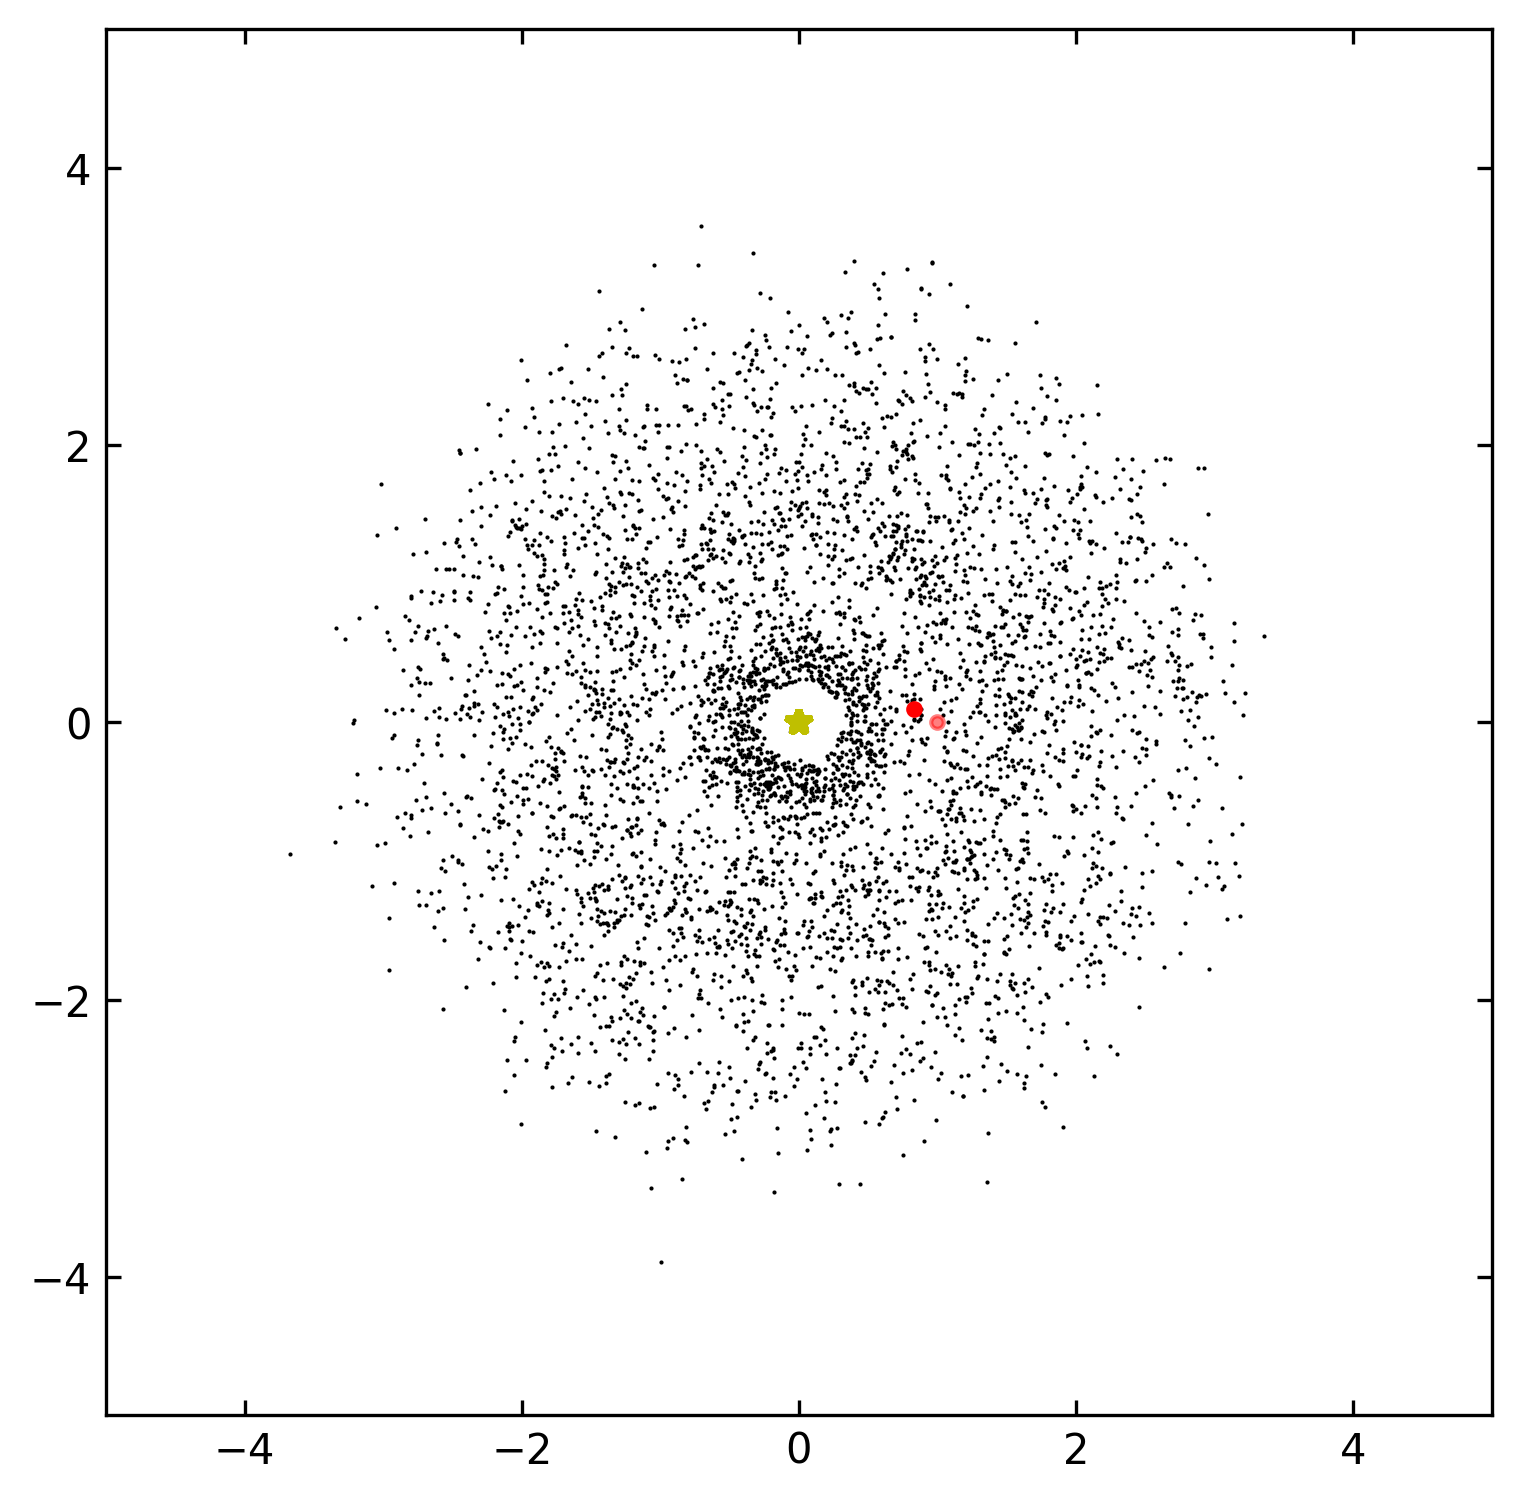

In [10]:
# The (x,y) limits for the snapshots
L = boxsize/2

print("Making plots:")
for i,t in enumerate(times):
    show_progress(i)
    
    # plot the current configuration of the particles in the planet's frame
    plt.figure(figsize=(6,6), dpi=150)    
    plt.xlim((-L,L))
    plt.ylim((-L,L))
    
    plt.plot(xy[i,:,0],xy[i,:,1],'ko',ms=1,markeredgewidth=0)
    plt.plot(xs,ys, marker='*', color='y', ms=6)
    plt.plot(xp[0],yp[0], marker='o', color='r', ms=3, alpha=0.5)
    plt.plot(xp[i],yp[i], marker='o', color='r', ms=3)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('/Users/patrickhorlaville/Downloads/PHYS633/week5/pngs/png_50orbits/plot%03d.png' % (i,))
    if i==Noutputs-1: # show the last plot
        plt.show()
    plt.close()

After 50 orbits, we can see how the planet has moved towards the star

In [29]:
sim.particles["planet"].orbit(primary = sim.particles["star"]).a

0.8233112813391802

Its semi-major axis went from a=1 to a=0.82 !

b)

In [6]:
start = time.time()

sim = rebound.Simulation()

# start the visualization server: in your browser go to http://localhost:1234
sim.start_server(port=1234)

# use a tree code since we will have many particles
sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.dt = 0.01
# soften the interaction for close approaches
sim.softening = 0.01

# define a box size for the simulation and add "open" boundary conditions
# particles that leave the box will be removed
boxsize = 10
sim.configure_box(boxsize)
sim.boundary = "open"

# Star
# we'll use a hash to label it so we can find it later
sim.add(m=1.0, hash="star")
sim.add(m=0.001, a=1.0, e=0, hash='planet')

# Planetesimals
Nparticles = 5000
setup_disk(N=Nparticles, mass=1e-2)

sim.move_to_com()

Noutputs = 500
Norbits = 50

print("Running simulation:")
times = np.linspace(0, Norbits * 2*np.pi, Noutputs)
dt = times[-1]/(Noutputs-1)
xy = np.zeros((Noutputs, Nparticles+2, 2))
xs = np.zeros(Noutputs)
ys = np.zeros(Noutputs)
xp = np.zeros(Noutputs)
yp = np.zeros(Noutputs)

porb = [0 for i in range(Noutputs)]

for i,t in enumerate(times):
    sim.integrate(t, exact_finish_time=1)
    show_progress(i)
    # store the particle positions
    for j, p in enumerate(sim.particles):
        # store the (x,y) locations of each particle
        xy[i][j] = [p.x, p.y]
    # the star position is included in xy[][] but we'll also store it separately:
    xs[i] = sim.particles["star"].x
    ys[i] = sim.particles["star"].y

    # the star position is included in xy[][] but we'll also store it separately:
    xp[i] = sim.particles["planet"].x
    yp[i] = sim.particles["planet"].y

    # store any and all information about the planet; more practical
    porb[i] = sim.particles["planet"].orbit(primary = sim.particles["star"])

# shut down the visualization server; this will stop it complaining next time we run the simulation
sim.stop_server(port=1234)
print('\nSim time = %.3f s' % (time.time()-start,))

Running simulation:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................
Sim time = 209.631 s


In [34]:
planet_a = np.zeros(Noutputs)
planet_e = np.zeros(Noutputs)

for i in range(len(times)):
    planet_a[i] = porb[i].a
    planet_e[i] = porb[i].e

# Comparing with Kirsh
a_0 = 1.0
dadt_0 = (planet_a[13] - planet_a[0])/(times[13] - times[0])
at_Kirsh = a_0 + dadt_0*times

Text(0, 0.5, 'e')

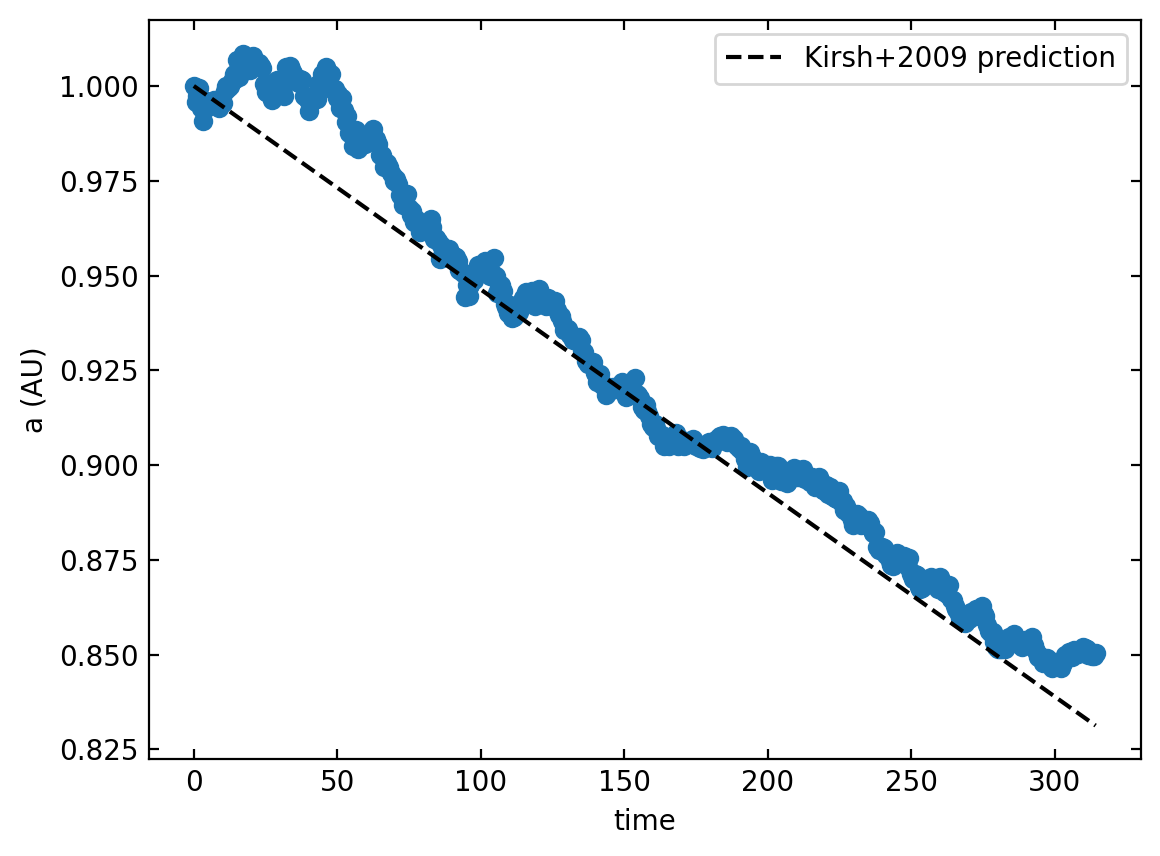

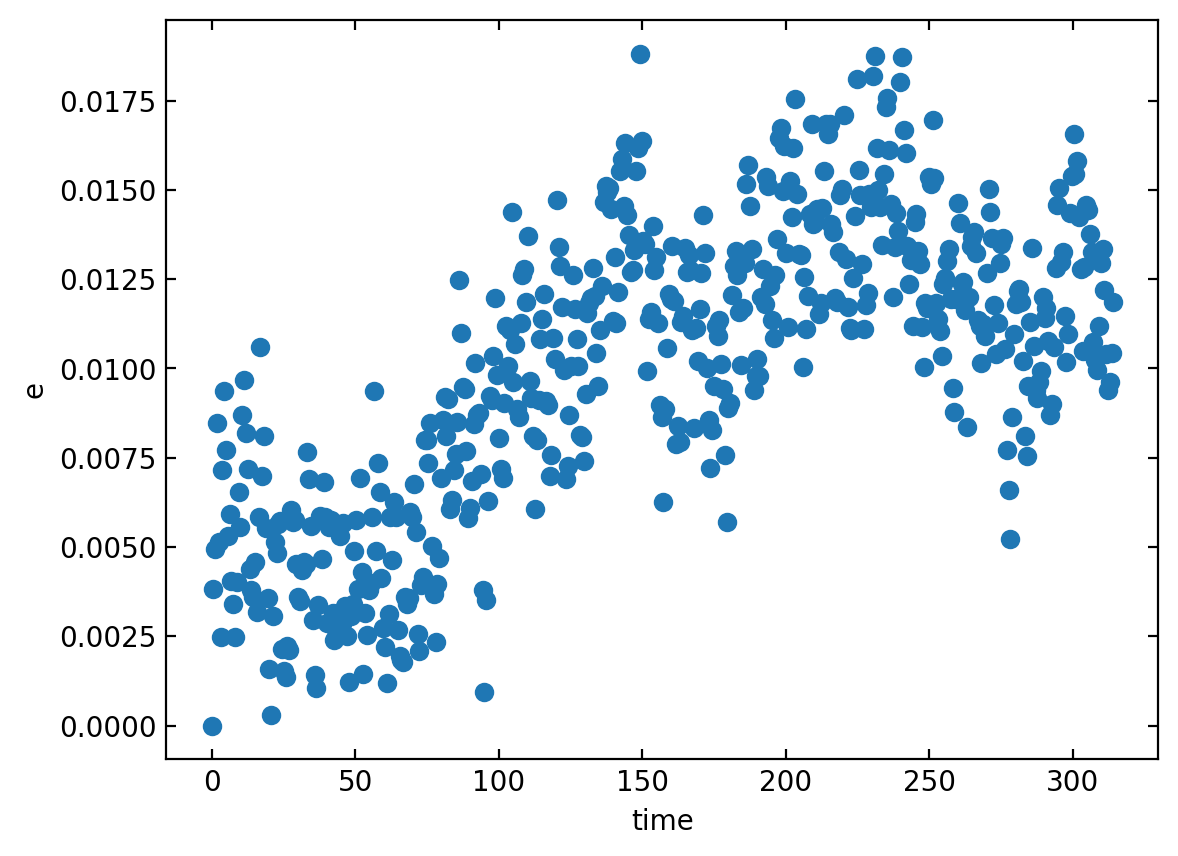

In [35]:
plt.figure(0)
plt.scatter(times, planet_a)
plt.plot(times, at_Kirsh, label='Kirsh+2009 prediction', color='k', linestyle='--')
plt.legend()

plt.legend()

plt.xlabel('time')
plt.ylabel('a (AU)')

plt.figure(1)
plt.scatter(times, planet_e)

plt.xlabel('time')
plt.ylabel('e')

Note that the slope of a(t) at t=0 (which is the predicted slope of the a(t) Kirsh relation) can be somewhat chosen: for example, we can take the slope between the first and second data points, or the first and the tenth data points. If we look at our data for a(t) above, depending if we take the slope between the first and second, or the first and tenth data points, it will change the value of the slope considerably. One can pick two data points such that the resulting slope visually matches the one from the blue curve at early times. That's how I chose my data points to compute the slope.

And it's a good match! In other words, the migration rate of our planet seems constant in time, as predicted by Kirsh+2009

Here is a little illustration of what I mean:

In [36]:
def a(n):
    return (planet_a[n] - planet_a[0])/(times[n] - times[0])

Text(0, 0.5, 'resulting slope value')

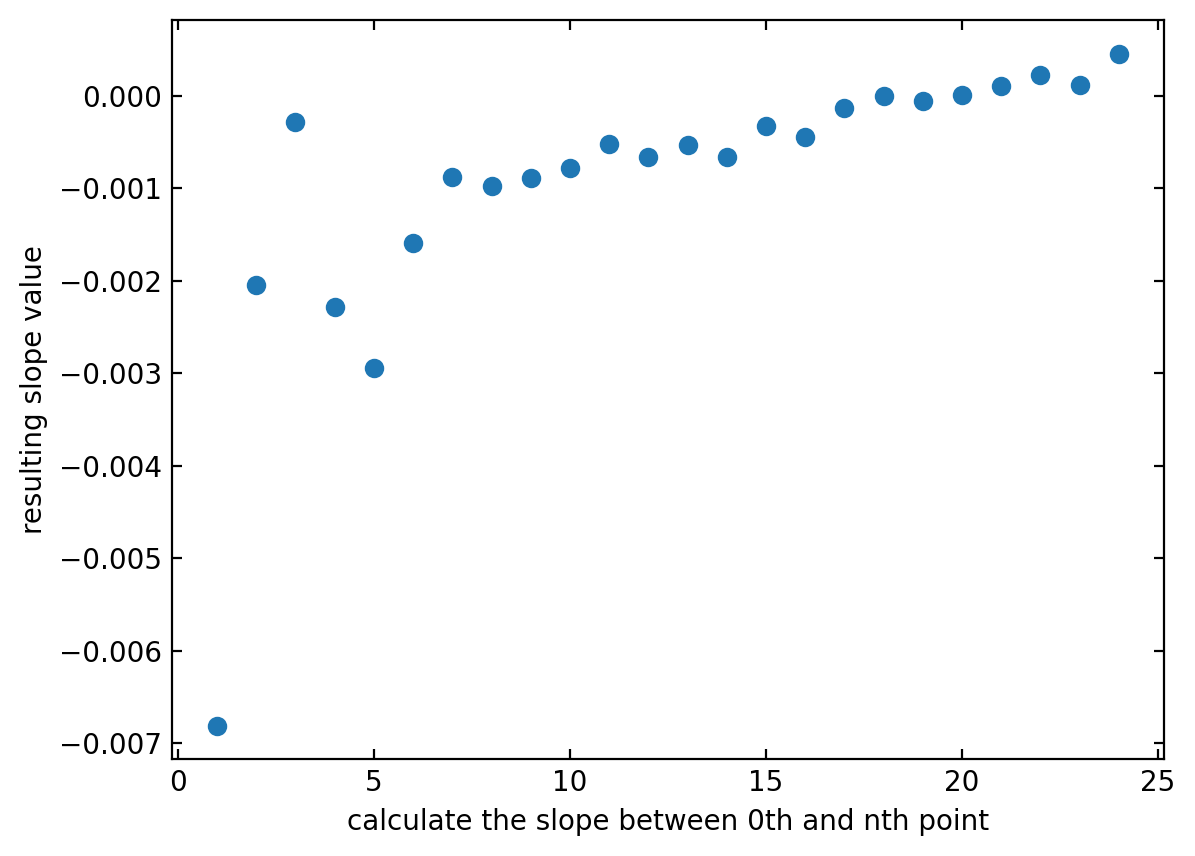

In [67]:
up_to_n = 25
n_space = np.array(list(range(1, up_to_n)))
a_space = a(n_space)

plt.scatter(n_space, a_space)

plt.xlabel('calculate the slope between 0th and nth point')
plt.ylabel('resulting slope value')

c)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

sim = rebound.Simulation()
sim.start_server(port=1234)

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import rebound
import time
import numpy as np
import random

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

def show_progress(i):
    # shows progress during long simulations
    print(".", end="", flush=True)
    if not (i+1)%80:
        print() # start a new line
    return

def setup_disk(N=10000, mass=1e-2):
    # initialize a circular disk of N planetesimals
    for i in range(N):
        # choose a random radial location and angle around the orbit
        r = np.random.uniform(0.3, 3.0)
        theta = np.random.uniform(0, 2*np.pi)
        sim.add(
            # set the planetesimal mass so that we get the correct total mass for the disk
            m=mass/N,
            # circular orbit
            x=r*np.cos(theta),
            y=r*np.sin(theta),
            vx=-np.sin(theta)/np.sqrt(r),
            vy=np.cos(theta)/np.sqrt(r)
        )
    return

In [2]:
start = time.time()

sim = rebound.Simulation()

# start the visualization server: in your browser go to http://localhost:1234
sim.start_server(port=1234)

# use a tree code since we will have many particles
sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.dt = 0.01
# soften the interaction for close approaches
sim.softening = 0.01

# define a box size for the simulation and add "open" boundary conditions
# particles that leave the box will be removed
boxsize = 10
sim.configure_box(boxsize)
sim.boundary = "open"

# we'll use a hash to label it so we can find it later
m_star = 1.
m_planet = 0.001

sim.add(m=m_star, hash="star")
sim.add(m=m_planet, a=1.0, e=0, hash='planet')

# Planetesimals
Nparticles = 5000
setup_disk(N=Nparticles, mass=1e-2)

sim.move_to_com()

Noutputs = 500
Norbits = 50

print("Running simulation:")
times = np.linspace(0, Norbits * 2*np.pi, Noutputs)
dt = times[-1]/(Noutputs-1)
xy = np.zeros((Noutputs, Nparticles+2, 2))
xs = np.zeros(Noutputs)
ys = np.zeros(Noutputs)
xp = np.zeros(Noutputs)
yp = np.zeros(Noutputs)

porb = [0 for i in range(Noutputs)]
planetesimal_orbs = [None for _ in range(Noutputs)]

for i,t in enumerate(times):
    sim.integrate(t, exact_finish_time=1)
    show_progress(i)
    # store the particle positions
    for j, p in enumerate(sim.particles):
        # store the (x,y) locations of each particle
        xy[i][j] = [p.x, p.y]


    planetesimal_orbs[i] = []
    
    for j in range(len(sim.particles)):
        if sim.particles[j].m<0.001:
            planetesimal_orbs[i].append(sim.particles[j].orbit(primary = sim.particles["star"]))
                
    # the star position is included in xy[][] but we'll also store it separately:
    xs[i] = sim.particles["star"].x
    ys[i] = sim.particles["star"].y

    # the star position is included in xy[][] but we'll also store it separately:
    xp[i] = sim.particles["planet"].x
    yp[i] = sim.particles["planet"].y

    # store any and all information about the planet; more practical
    porb[i] = sim.particles["planet"].orbit(primary = sim.particles["star"])

# shut down the visualization server; this will stop it complaining next time we run the simulation
sim.stop_server(port=1234)
print('\nSim time = %.3f s' % (time.time()-start,))

Running simulation:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................
Sim time = 227.724 s


Calculate Hill's radius and factor (which change as the planet migrates)

In [3]:
R_H = np.zeros(Noutputs)
chi = np.zeros(Noutputs)

for i in range(Noutputs):
    R_H[i] = porb[i].a * (0.001/(3*1.))**(1/3) # in REBOUND units, G=1, such that masses are in solar masses, and distances in AU
    chi[i] = R_H[i]/porb[i].a

In [4]:
planetesimals_eH = np.zeros((Noutputs, Nparticles))
planetesimals_a = np.zeros((Noutputs, Nparticles))

for i in range(Noutputs):
    for j in range(Nparticles):
        planetesimals_eH[i][j] = (planetesimal_orbs[i][j].e)/(chi[i])
        planetesimals_a[i][j] = planetesimal_orbs[i][j].a

Making plots:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................

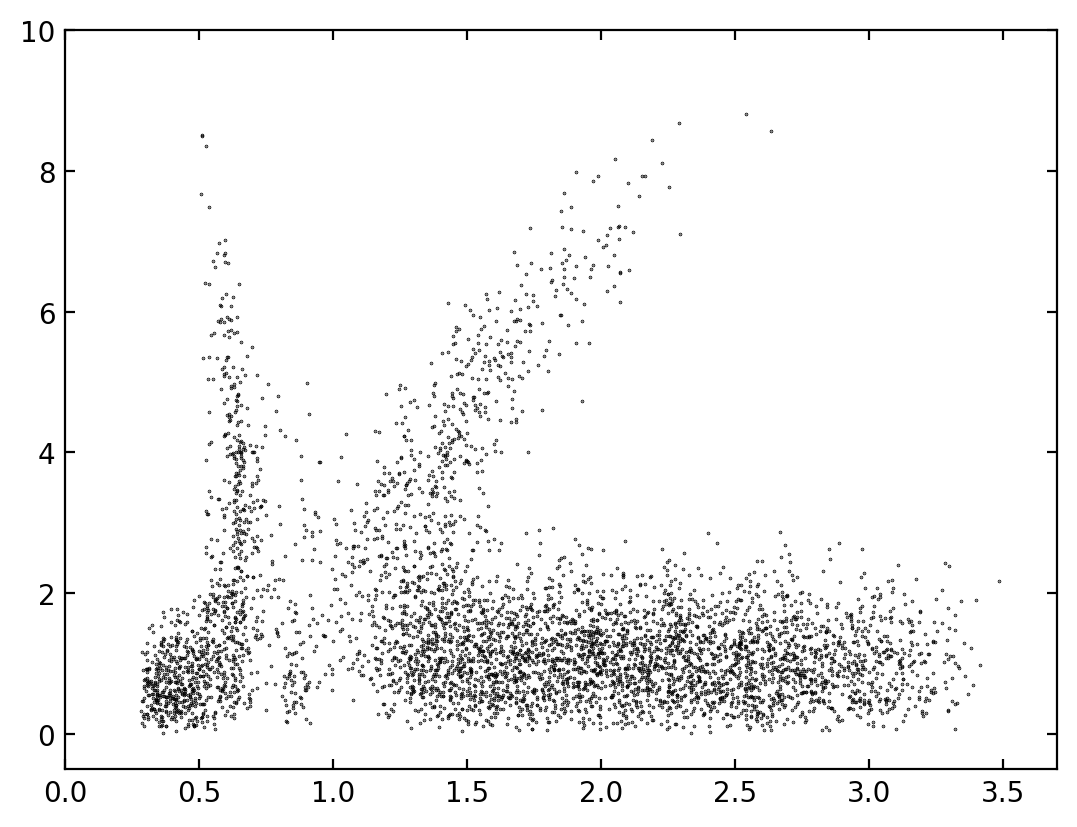

In [7]:
print("Making plots:")
for i,t in enumerate(times):
    show_progress(i)
    
    # plot the current configuration of the particles in the planet's frame
    #plt.figure(figsize=(6,6), dpi=150)    
    plt.xlim((0, 3.7))
    plt.ylim((-0.5, 10))
    
    plt.scatter(planetesimals_a[i], planetesimals_eH[i], s=0.3, marker='.', color='k')

    #plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('/Users/patrickhorlaville/Downloads/PHYS633/week5/pngs/png_eHa/plot%03d.png' % (i,))
    if i==Noutputs-1: # show the last plot
        plt.show()
    plt.close()

In [8]:
def C_T(a, a_P, e, i):
    return a_P/a + 2*np.sqrt(a/a_P)*np.sqrt(1-e**2)*np.cos(i)

In [9]:
planet_a = np.zeros(Noutputs)
planet_e = np.zeros(Noutputs)

for i in range(Noutputs):
    planet_a[i] = porb[i].a
    planet_e[i] = porb[i].e

a_outer_feedingz = planet_a + 3.5*R_H

In [10]:
C_T_outer = C_T(a=a_outer_feedingz, a_P=planet_a, e=planet_e, i=0)

In [11]:
def alpha_func(alpha, alpha_P, e, i, CT):

    'C_T function but to solve for alpha, which is sqrt(a); see cubic_equation.pdf for (straightforward) derivation'
    
    arg_alpha3 = (2/alpha_P)*np.sqrt(1-e**2)*np.cos(i)
    arg_alpha2 = -CT
    const = alpha_P**2

    return arg_alpha3*(alpha**3) + arg_alpha2*(alpha**2) + const

In [12]:
planet_alpha = np.sqrt(planet_a)

In [13]:
from scipy import optimize
sol = optimize.root(alpha_func, x0=planet_alpha, args=(planet_alpha, planet_e, 0, C_T_outer))
a_sol = sol.x**2 # the equation alpha func was to solve for sqrt(a); square it to get the solution for a
C_T_inner = C_T(a=a_sol, a_P=planet_alpha**2, e=planet_e, i=0) # calculate corresponding C_T to make sure they're the same as C_T outer

Text(0, 0.5, '$C_\\mathrm{T, outer} - C_\\mathrm{T, inner}$')

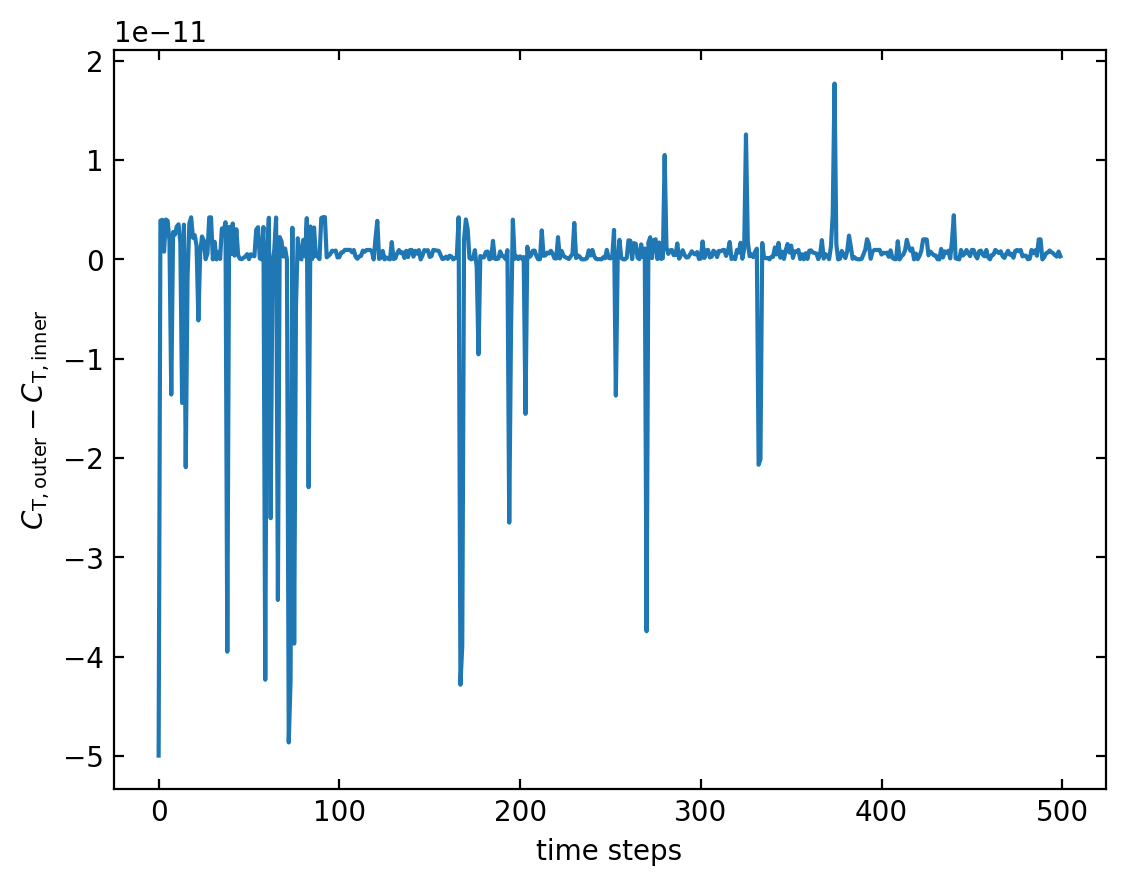

In [14]:
plt.plot(C_T_outer-C_T_inner)
plt.xlabel('time steps')
plt.ylabel(r'$C_\mathrm{T, outer} - C_\mathrm{T, inner}$')

Our solution for the inner radius of the feeding zone seems to be correct, since Tisserand's constant at their location is the same as Tisserand's constant at the outer feeding zone radius, down to a fraction of ~1e-11

In [15]:
e_space_len = 100
e_space = [None for _ in range(Noutputs)]
for i in range(Noutputs):
    e_space[i] = np.linspace(0, 10, e_space_len)*chi[i]

e_space = np.array(e_space)

In [27]:
alpha_sol_inner = optimize.root(alpha_func, x0=planet_alpha, args=(planet_alpha, e_space.T[0], 0, C_T_outer))
a_sol_inner = alpha_sol_inner.x**2 # the equation alpha func was to solve for sqrt(a); square it to get the solution for a

alpha_sol_outer = optimize.root(alpha_func, x0=planet_alpha+(3.5*0.067), args=(planet_alpha, e_space.T[0], 0, C_T_outer))
a_sol_outer = alpha_sol_outer.x**2 # the equation alpha func was to solve for sqrt(a); square it to get the solution for a

In [76]:
a_sol_inner = [None for _ in range(e_space_len)]
a_sol_outer = [None for _ in range(e_space_len)]

for i in range(e_space_len):
    alpha_sol_inner = optimize.root(alpha_func, x0=planet_alpha-0.5, args=(planet_alpha, e_space.T[i], 0, C_T_outer))
    a_sol_inner[i] = alpha_sol_inner.x**2 # the equation alpha func was to solve for sqrt(a); square it to get the solution for a
    
    alpha_sol_outer = optimize.root(alpha_func, x0=planet_alpha+1, args=(planet_alpha, e_space.T[i], 0, C_T_outer))
    a_sol_outer[i] = alpha_sol_outer.x**2 # the equation alpha func was to solve for sqrt(a); square it to get the solution for a

In [78]:
a_sol_inner = np.array(a_sol_inner)
a_sol_outer = np.array(a_sol_outer)

In [89]:
res21 = planet_a * 0.5**(2/3) # location of the 2:1 resonance

Making plots:
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
................................................................................
....................

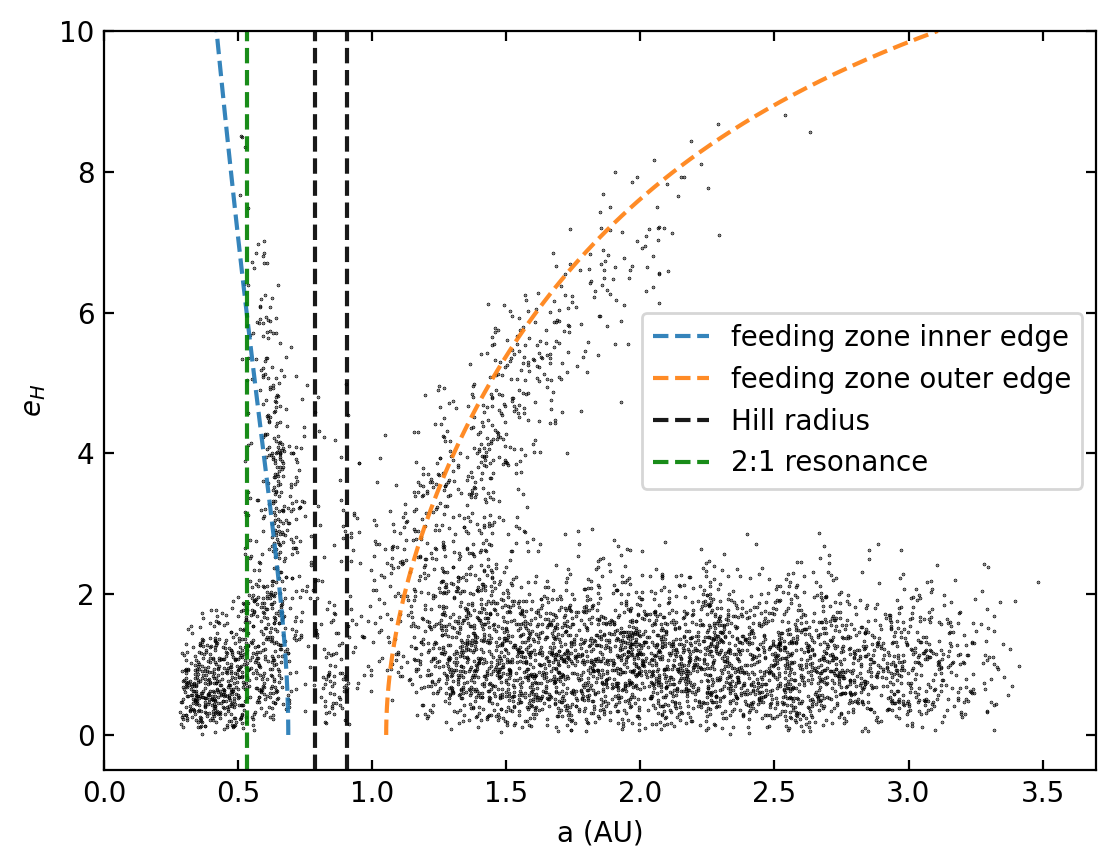

In [90]:
lim = 100 # beyond which solutions for outer feeding zone get.. weird for some reason; the reason= my root picking algorithm needs refinement, sometimes it finds the outer instead of the inner boundary and vice versa
# ok i fixed it

print("Making plots:")
for i,t in enumerate(times):
    show_progress(i)
    
    # plot the current configuration of the particles in the planet's frame
    #plt.figure(figsize=(6,6), dpi=150)    
    plt.xlim((0, 3.7))
    plt.ylim((-0.5, 10))
    
    plt.scatter(planetesimals_a[i], planetesimals_eH[i], s=0.3, marker='.', color='k')

    plt.plot(a_sol_inner.T[i][0:lim], e_space[i][0:lim]/chi[i], '--', alpha=0.9, label='feeding zone inner edge')
    plt.plot(a_sol_outer.T[i][0:lim], e_space[i][0:lim]/chi[i], '--', alpha=0.9, label='feeding zone outer edge')
    
    plt.axvline(x=planet_a[i]-R_H[i], linestyle='--', color='k', alpha=0.9, label='Hill radius')
    plt.axvline(x=planet_a[i]+R_H[i], linestyle='--', color='k', alpha=0.9)

    plt.axvline(x=res21[i], linestyle='--', color='g', alpha=0.9, label='2:1 resonance')

    plt.xlabel('a (AU)')
    plt.ylabel(r'$e_H$')

    plt.legend(loc=5)

    #plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('/Users/patrickhorlaville/Downloads/PHYS633/week5/pngs/png_eHa_full/plot%03d.png' % (i,))
    if i==Noutputs-1: # show the last plot
        plt.show()
    plt.close()